# <center>Digital Image Processing - Problem Set 4</center>

### Student Names:      
* Karolay Ardila Salazar
* Julián Sibaja García
* Andrés Simancas Mateus

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Definitions

In [1]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import os
import cv2
import matplotlib.pyplot as mplt
import random


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = sorted(os.listdir(pth))
print files

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

['Fall-Nature-Background-Pictures.jpg', 'Fig6.21(b).jpg', 'Woman.bmp', 'blown_ic.png', 'blurry_moon.png', 'building.jpg', 'cameraman.png', 'cameraman_new.png', 'check.png', 'chest.jpg', 'ckt_board_saltpep_prob_pt05.png', 'connected.jpg', 'contact_lens_original.png', 'crosses.png', 'darkPollen.jpg', 'dark_fountain.jpg', 'face.png', 'fingerprint.jpg', 'flower.jpg', 'fruits.jpg', 'hiro.jpg', 'hut.jpg', 'lena.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'mms.jpg', 'moon.jpg', 'new_cameraman.png', 'new_chest.bmp', 'noisy_fingerprint.jpg', 'out.png', 'pollen.jpg', 'rectangle.png', 'rose.bmp', 'runway.jpg', 'skull.bmp', 'small_blobs.jpg', 'spheres.jpg', 'spine.jpg', 'squares.jpg', 'steve_blog.png', 'test_pattern_blurring_orig.png', 'translated_rectangle.png', 'weld_x-ray.jpg']


## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


### Análisis
El propósito del siguiente código es verificar si la aplicación de erosión y dilatación, en un orden especifico y un numero de veces determinado en una imagen, tiene el mismo efecto de aplicar apertura y luego cierre en una imagen. Para esto primero se aplica erosión, luego dos veces dilatación y por ultimo erosión; Al compara es lo mismo que hacer apertura (erosión y luego dilatación) y luego cierre que es el proceso contrario. A continuación se tienen 2 funciones que hacen este proceso los dos caminos diferentes, ya sea aplicando erosión y dilatación o aplicando apertura y cierre. Ambas funciones tomas como parámetro de entrada una imagen y devuelven la imagen con las respectivas modificaciones morfológicas aplicadas.

Se puede ver que por estas dos formas el resultado es el mismo comparando las imágenes de abajo. Además de esto se pudo comprobar la eficacia que tienen este tipo de operaciones morfológicas para elimiar algunos componentes de la imagen que se pueden considerar ruido.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

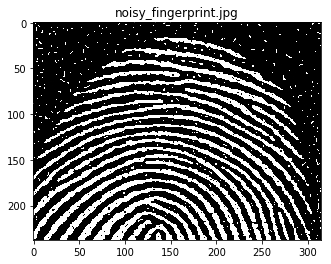

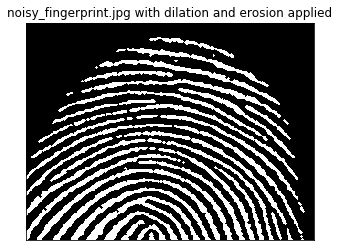

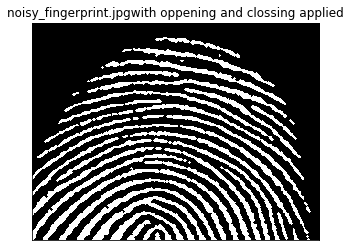

In [19]:
def erotionNDilation(img):
    # Structuring element
    se = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    # Applying Erotion first time
    img_morphed = cv2.erode(img,se,iterations = 1)
    # Applying Dilation 2 times
    img_morphed = cv2.dilate(img_morphed,se,iterations = 2)
    # Applying Erotion Second time
    img_morphed = cv2.erode(img_morphed,se,iterations = 1)
    
    return img_morphed

def oppNCloss(img):
    # Structuring element
    se = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    # Performing oppening
    img_morphed = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
    # Performing Clossing
    img_morphed = cv2.morphologyEx(img_morphed, cv2.MORPH_CLOSE, se)
    return img_morphed 

img_name = files[29]
img = cv2.imread('../data/'+img_name,0)
img_ero_dil = erotionNDilation(img)
img_opp_closs = oppNCloss(img)

# Plotting
mplt.imshow(img, cmap='gray'),mplt.title(img_name)
mplt.figure()
mplt.imshow(img_ero_dil, cmap='gray'),mplt.title(img_name+" with dilation and erosion applied")
mplt.xticks([]), mplt.yticks([])
mplt.figure()
mplt.imshow(img_opp_closs, cmap='gray'),mplt.title(img_name+"with oppening and clossing applied")
mplt.xticks([]), mplt.yticks([])    

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:

In [20]:
%matplotlib qt
# wx, gtk, osx or tk


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


### Análisis
Para la realización del siguiente código se utilizó nuevamente la operación de dilatación. La cual cumple un papel importante ya que es la que la imagen se "expanda" y así poder rellenar la región. Una vez que se hace dilatación se hace intersección con el complemento a la imagen original para limitar que no se escape de los bordes. Al final no habrá cambios al aplicar este proceso repetidamente, y en ese punto se habrá llenado la región completamente. La función acepta una imagen como parámetro de entrada y regresa una imagen con la región que se encuentra en el punto que se seleccionará como salida, esto es, solo rellena una región cuando la función es llamada.

Esta aplicación de erosión es bastante útil ya que, nos permite rellenar cualquier región en una imagen binaria,y además de esto lo hace de forma rápida.


In [22]:
def fill(A):
    # Complement of A
    A_c = 255 - A 
    # Getting the x,y point
    mplt.imshow(A, cmap='gray');mplt.title('Select a region to fill')
    xy = mplt.ginput(1)
    xy = (int(round(xy[0][0])),int(round(xy[0][1])))
    h,w = A.shape
    mplt.close()
    
    # Creating x array
    x = np.zeros((h,w),dtype = np.uint8)
    x[xy[1],xy[0]] = 255
    
    # Creating the structuring element
    B = np.array([[0,255,0],[255,255,255],[0,255,0]],dtype = np.uint8)
    
    # Iterating according to the ecuation
    x_last = x[:,:]
    x = cv2.dilate(x,B,iterations = 1)
    while not(np.array_equal(x,x_last)):
        x_last = x[:,:]
        x = cv2.dilate(x,B,iterations = 1)
        x = np.bitwise_and(x,A_c)
    
    #Once the convergence is reached, the union is calculated
    filled = np.bitwise_or(x,A)
    return filled

img_name = files[37]
img = rg(img_name)

# Filling and plotting
img_filled = fill(img)
mplt.imshow(img_filled, cmap = 'gray')
for i in range(16): 
    img_filled = fill(img_filled)
    mplt.imshow(img_filled, cmap = 'gray')
mplt.close()

## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="../data/files/crosses.png"/>
<img src="../data/files/connected.jpg"/>

### Análisis

Comenzamos nuestro programa guardando la imagen que vamos a utilizar en una variable. Luego seguimos con definir nuestra función que recibe dos parámetros, la imagen y el valor de adjacency. Aplicamos threshold con la función cv2 llamada de la misma forma y cambiamos la imagen a BGR, además creamos las máscaras que usaremos más adelante con la función floodFill y obtenemos el tamaño de la imagen para recorrer pixel a pixel dentro de un for. Es necesario comparar el valor de adjacency que se ingrese. Los posibles valores son 4 u 8 cuando no se presenta ninguno de estos dos casos mostramos un mensaje que indica los dos valores permitidos para esta variable. Dependiendo si el valor es 4 u 8 seleccionaremos un valor para flag de 4 u 8 correspondientemente en la función floodFill y por último mostramos las imágenes resultantes.

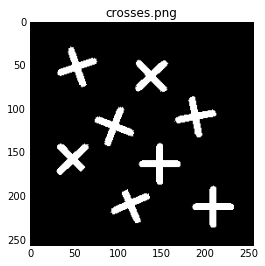

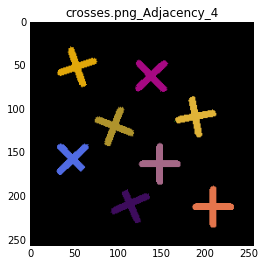

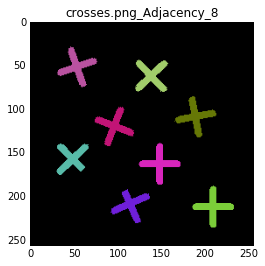

In [5]:
crosses = rg(files[13])

def labelConnectedComponents(img, adjacency):
    ret,thresh = cv2.threshold(img, 127, 255, 0) # Saving image with threshold in "thresh"
    color_image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    
    height, width = thresh.shape 
    mask = np.zeros((height + 2, width + 2), np.uint8)
    mask2 = np.zeros((height + 2, width + 2), np.uint8)
    k = 0 
        
    if adjacency == 4:
        for i in range(height):
            for j in range(width):
                if(thresh[i,j] == 255): 
                    k = k + 1
                    
                    R_4 = random.randint(0,255) # Choosing a random RGB value
                    G_4 = random.randint(0,255)
                    B_4 = random.randint(0,255)
                    
                    cv2.floodFill(color_image, mask,(j,i), (B_4,G_4,R_4), flags = 4)
                    cv2.floodFill(thresh, mask2,(j,i), 125, flags = 4)
                    
        mplt.figure()
        mplt.imshow(color_image, cmap='gray')
        mplt.title(files[13] + '_Adjacency_4')
        mplt.show()
                    
    elif adjacency == 8: 
        for i in range(height):
            for j in range(width):
                if(thresh[i,j] == 255): 
                    k = k + 1 
                    
                    R_8 = random.randint(0,255) 
                    G_8 = random.randint(0,255)
                    B_8 = random.randint(0,255)
                    
                    cv2.floodFill(color_image, mask,(j,i), (B_8,G_8,R_8), flags = 8) 
                    cv2.floodFill(thresh, mask2,(j,i), 125, flags = 8)
                    
        mplt.figure()
        mplt.imshow(color_image, cmap='gray')
        mplt.title(files[13] + '_Adjacency_8')
        mplt.show()
                    
    else: 
        print 'Adjacency value not define. Posible values: 4, 8'
        

mplt.figure()
mplt.imshow(crosses, cmap='gray')
mplt.title(files[13])
mplt.show()

labelConnectedComponents(crosses,4)
labelConnectedComponents(crosses,8)

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

### Análisis

El proceso mostrado en el blog de Matlab se reduce a los siguientes pasos:

* Hacer eroción de la imagen con un elemento estructurante vertical,
* Rellenar las letras que coincidan con el resultado de la erosión (en esos puntos)

El primero de los dos pasos es idéntico en Python: se crea una columna de unos (de largo 51) y se erosiona la imagen con esta columna como elemento estructurante. Hasta ahora los resultados obtenidos son idénticos a aquellos del blog de Matlab. La idea siguiente es hacer un rellenado de las letras partiendo de los puntos que quedaron luego de hacer la erosión. Para esto recuperamos los puntos en una lista (de puntos) valiéndonos de la función `nonzero` de numpy. Usando estos puntos como base se llama a la función `cv2.floodFill`; esta función recibe como parámetros una imagen de salida, una máscara, un punto para comenzar a rellenar y el color de relleno. Por alguna razón el punto se tiene que dar al reves ([y,x] en vez de [x,y]); la máscara es la imagen original invertida, esto es porque `floodFill` se detiene cuando encuentra fronteras de unos, por lo tanto las letras no pueden ser blancas.

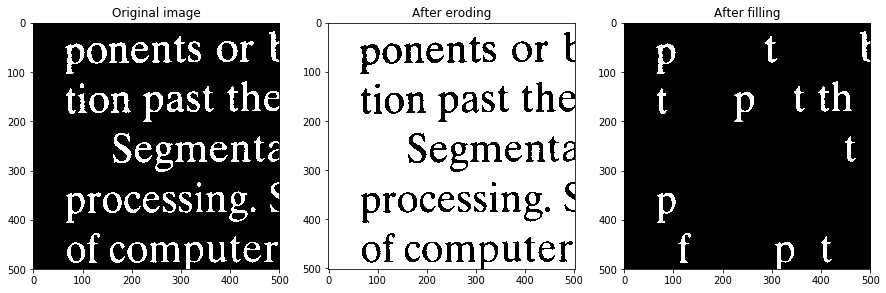

In [3]:
# Get image
img = rg(files[40])

# Erode image
ero_element = np.ones([51, 1], np.uint8)
img_ero = cv2.erode(img, ero_element, iterations = 1)

# Creating mask
mask = img.copy()
mask = cv2.bitwise_not(mask)
mask = np.pad(mask, 1, 'constant')

h, w = img.shape
img_filled = np.zeros([h, w], np.uint8)

non_zeros = np.transpose(np.nonzero(img_ero))

for n in non_zeros:
    cv2.floodFill(img_filled, mask, tuple([n[1], n[0]]), 255)

# Printing
f, ax = mplt.subplots(1, 3, figsize=(15,15))
    
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('After eroding')

ax[2].imshow(img_filled, cmap='gray')
ax[2].set_title('After filling')


## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

### Análisis

Creamos una función llamada Detector, la cual recive como parámetros la imagen que se procesará, un número impar kernel para el filtro y los valores mínimos y máximos de threshold. Primero guardamos en una variable el resultado de aplicar el filtro en nuestra imagen seleccionada con la función GaussianBlur de cv2. Luego, en otra variable llamada edges guardamos el resultado de llamar la función Canny con la imagen filtrada como parámetro y finalmente mostramos la imagen resultante.

En los resultados podemos ver que para un mismo rango de threshold, entre menor sea el número de kernel para el filtro, se pueden detectar más bordes en la imagen. Respecto a cambiar el valor de threshold vemos que a medida que aumentamos el máximo valor de este se logran detectar menos bordes. 

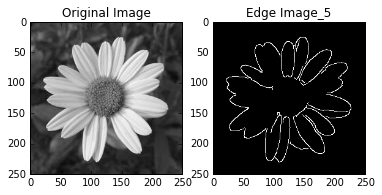

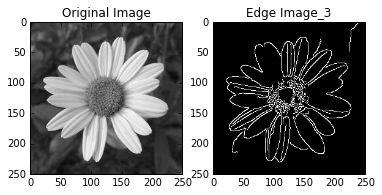

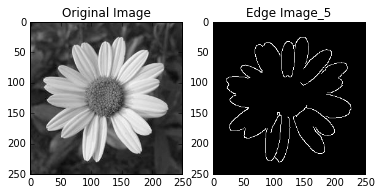

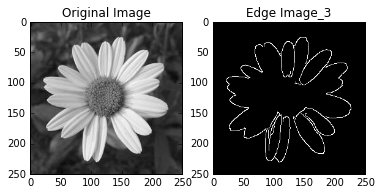

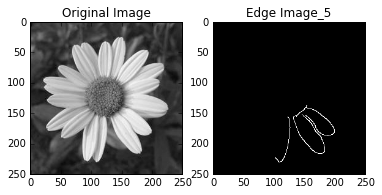

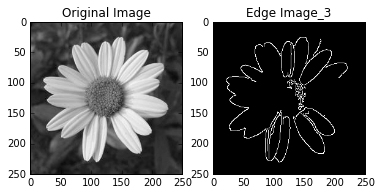

In [4]:
img = rg(files[18])

def Detector(img, kernel, minT, maxT):
    smooth = cv2.GaussianBlur(img, (kernel,kernel), 0) #(input_image, kernel(odd number))
    edges = cv2.Canny(smooth, minT, maxT) #(input_image, minValTh, maxValTh)
    
    mplt.subplot(121)
    mplt.imshow(img, cmap = 'gray')
    mplt.title('Original Image')
    
    mplt.subplot(122)
    mplt.imshow(edges, cmap = 'gray')
    mplt.title('Edge Image_'+str(kernel))
    mplt.show()

Detector(img, 5, 5, 200)
Detector(img, 3, 5, 200)

Detector(img, 5, 100, 400)
Detector(img, 3, 100, 400)

Detector(img, 5, 50, 600)
Detector(img, 3, 50, 600)

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

### Análisis

La función de la transformación de Hough, llamada `houghTransform` recibe como parámetros la imagen de bordes (binaria) y una imagen en color. Con esto calcula las líneas de Hough; cabe notar que la implementación utilizada del algoritmo es la probabilística, ya que la versión simple arroja mucho ruido. Las líneas encontradas se convierten al espacio cartesiano con `cv2.line` que a la vez las agrega a la imagen original en el canal de verde. Cabe notar que la función `houghTransform` depende severamente de la función `cv2.Canny` que es la que obtiene los bordes; dependiendo de los umbrales que se seleccionen en el `Canny`, así será el número de líneas encontrado. Para que la imagen de salida fuera decente se redujo la región de selección del `Canny` lo máximo posible. Se comprobaron los resultados con otras imágenes (como `cameraman.jpg`) y se llego a resultados aceptables (detecto las líneas del trípode de la cámara).

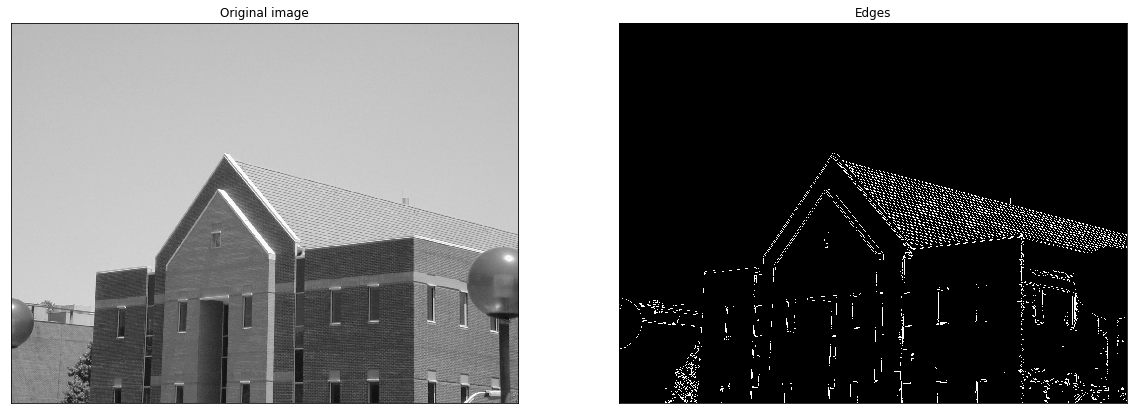

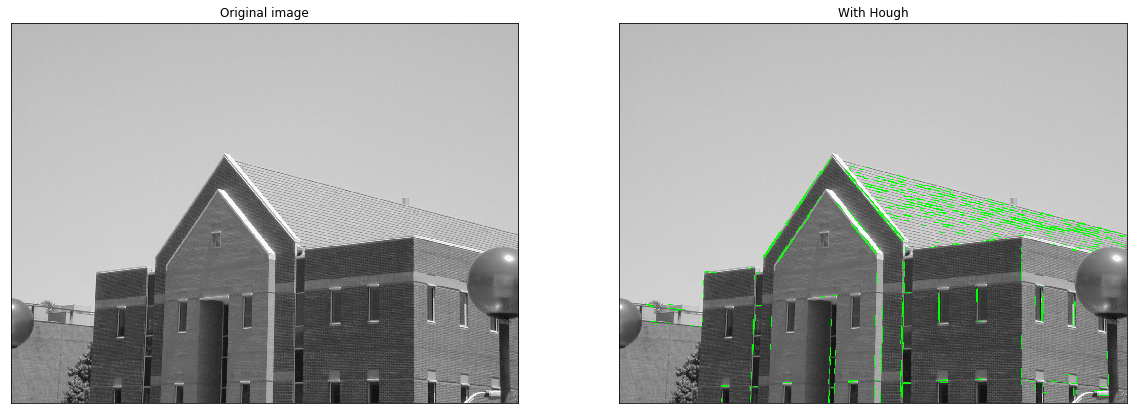

In [53]:
def houghTransform(edges, image):
    minLineLength = 100
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

# read image
img = cv2.imread(pth + files[5])
gray = rg(files[5])

imgc = img.copy()

# Get edges
img_canny = cv2.Canny(gray, 100, 250)

# Hough transform
houghTransform(img_canny, imgc)

# Printing
f, ax = mplt.subplots(1, 2, figsize=(20,20))
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
    
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')

ax[1].imshow(img_canny, cmap='gray')
ax[1].set_title('Edges')

f, ax = mplt.subplots(1, 2, figsize=(20,20))
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
    
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')

ax[1].imshow(cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB))
ax[1].set_title('With Hough')


## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


### Análisis

La idea del Threshold adaptativo es que el valor de umbral sea lo más centralizado posible respecto a la intensidad general de la imagen; esto es, los valores menores y mayores que él tengan un mismo valor de intensidad media sin importar cuántas iteraciones se repita el proceso. Para ello se diseñó la función adaptativeThresholding, que es una función recursiva que itera hasta que las sucesiones de T (valor de umbral) den prácticamente igual. Lo primero que se hace es calcular un valor inicial (promedio entre el máximo y el mínimo), luego se llama a la función de umbralización. Esta umbraliza la imagen con este valor y obtiene la media de las dos regiones de intensidades (menor y mayor que el umbral), con este valor se calcula el nuevo valor de umbral. Si este valor se diferencia del anterior en menos de un margen dado se detiene la ejecución, si no, se repite el proceso con el nuevo umbral. Con las imagen `fingerprint.jpg`, el proceso converge en 2 iteraciones.

40
57.9198776042


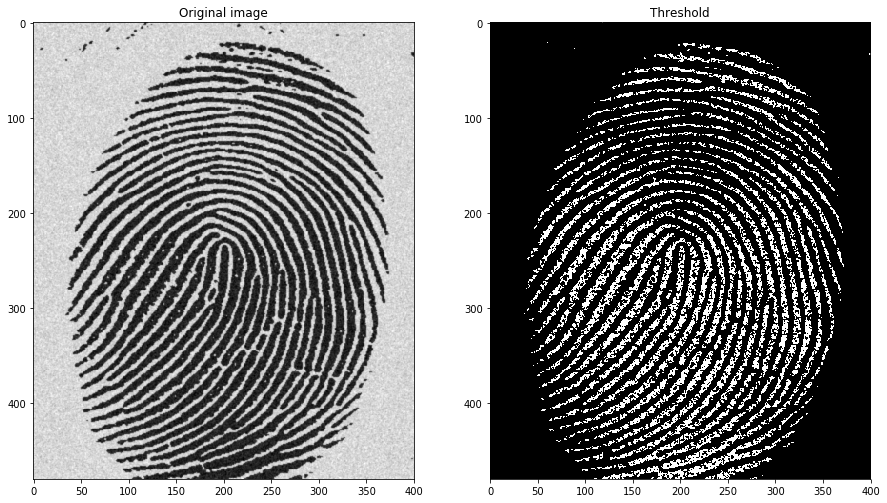

In [47]:
def adaptativeThresholding(img, T, TP, E):
    _, t = cv2.threshold(img, T, 255, cv2.THRESH_BINARY_INV)
    g1_mean = np.mean(t*img)
    g2_mean = np.mean(cv2.bitwise_not(t)*img)
    
    TP = T
    T = (g1_mean + g2_mean)/2
    
    if np.abs(TP - T) > e:
        return adaptativeThresholding(img, T, TP, E)
    else:
        return t

# Read image
image = rg(files[17])

# Initial threshold value
ti = (np.max(image)+np.min(image))/2

# Epsilon
e = 1e-3

# Threshold
th = adaptativeThresholding(image, ti, 0, e)

# Printing
f, ax = mplt.subplots(1, 2, figsize=(15,15))
    
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(th, cmap='gray')
ax[1].set_title('Threshold')


## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.


### Análisis
En este ejercicio se utilizo el algoritmo de K-means con el objetivo de segmentar partes de una imagen RGB. En este caso se utilizó como clustering para separar los colores de unos dulces en una imagen. Para hacer esto se creó una función llamada kmeans, la cual hace lo que dicta el algoritmo, lo cual es separar en grupos la información de los pixeles de la imagen. Para este caso se decidió haceer 9 grupos(K), ya que con esto nos dimos cuenta de que se alcanza a distinguir entre un grupo de dulces y otro. También se hizo lo mismo con la imagen en el espacio de color HSI, para esto se utilizó una función de los Problemas pasados. La función kmeans recibe como datos de entrada la imagen y la el numero de centros k.
Al final se puede ver que el espacio RGB y el HSI, nos permiten ver ambos la diferencia entre los grupos de dulces de colores. La diferencia radica que mientras en RGB se necesitó una K de 9, en HSI se nesesitó 8 para representar completamente todos los grupos.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars


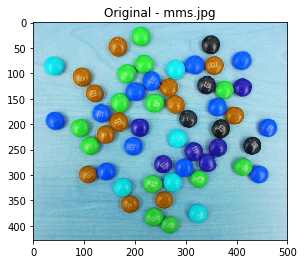

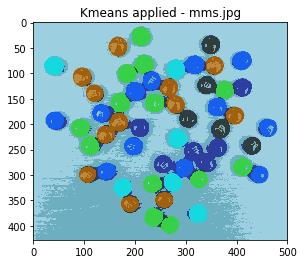

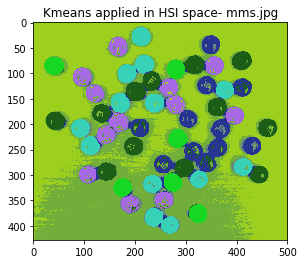

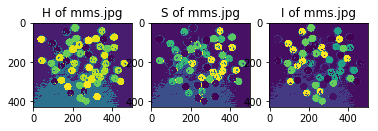

In [86]:
def kMeans(img,K):
    # Formating img to apply kmeans
    X = np.float32(img.reshape((-1,3)))
    # Setting the number of iterations and the accuracy
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # Applying kmeans algorithm
    _,label,center=cv2.kmeans(X,K,criteria,attempts= 10,flags = cv2.KMEANS_RANDOM_CENTERS)
    
    # Restoring the image to its original form
    center = np.uint8(center)
    res = center[label.flatten()]
    img_seg = res.reshape((img.shape))
    return img_seg
    
def rgb2hsi(img):
    hg, wd, _ = img.shape
    H = np.zeros((hg,wd))
    S = np.zeros((hg,wd))
    I = np.zeros((hg,wd))
    for i in range(0,hg):
        for j in range(0,wd):
            #Getting R,G,B values
            B = img[i][j][0]/255.0
            G = img[i][j][1]/255.0
            R = img[i][j][2]/255.0
            Cmin = min([B,G,R])
            
            I[i][j] = (B+G+R)/3.0

            if I[i][j] > 0:
                S[i][j] = 1-Cmin/I[i][j]

            if G >= B:
                h = (R - 0.5*G - 0.5*B)/((R**2.0 + G**2.0 + B**2.0 - R*G - R*B - G*B)**(1/2.0))
                if abs(h) <= 1:
                    H[i][j] = (np.arccos(h)*180)/np.pi
                else:
                    H[i][j] = np.pi
            else:
                h = (R - 0.5*G - 0.5*B)/((R**2 + G**2 + B**2 - R*G - R*B - G*B)**(1/2.0))
                if abs(h) <= 1:
                    H[i][j] = 360 - (np.arccos(h)*180)/np.pi
                else:
                    H[i][j] = np.pi
    return cv2.merge((H,S,I))

#Getting image and HSI image
img_name = files[25]
img = cv2.imread('../data/'+img_name,1)
hsi_img = rgb2hsi(img)
H,S,I = cv2.split(img)
H = np.multiply(H,255/np.amax(H))
S = np.multiply(S,255/np.amax(S))
I = I*255
hsi_img = cv2.merge((H,S,I))

# Applying the kmeans algorithm to a rgb and a hsi color images
img_kmrgb = kMeans(img,9)
img_kmhsi = kMeans(hsi_img,8)
h,s,i = cv2.split(img_kmhsi)

#Plotting
mplt.imshow(img);mplt.title('Original - '+img_name)
mplt.figure();mplt.imshow(img_kmrgb);mplt.title('Kmeans applied - '+img_name)
mplt.figure();mplt.imshow(img_kmhsi);mplt.title('Kmeans applied in HSI space- '+img_name)
mplt.figure()
mplt.subplot(131);mplt.imshow(h*255);mplt.title('H of '+img_name)
mplt.subplot(132);mplt.imshow(s*255);mplt.title('S of '+img_name)
mplt.subplot(133);mplt.imshow(i);mplt.title('I of '+img_name)